In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
raw_data = pd.read_csv(r'E:\Nextstep\Scaler\Business-Case-Study\Aerofit\Dataset\aerofit_treadmill.csv')

In [10]:
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Inference:**
- `No null values in all the columns`
- `3 categorical and 5 numerical columns`

In [12]:
raw_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Inference:**
- `25% of users in the age range of 24 to 26`
- `Education, Usage and fitness seems to be integer and it requires detailed analysis`
- ``

In [13]:
raw_data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


# Exploratory Data Analysis

In [27]:
plt.rcParams['figure.figsize'] = (12,6)

## UVA on Categorical column

In [34]:
def plot_count(df, col):
    plt.suptitle('Sales Quantity by ' + col)
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = col)
    plt.subplot(1,2,2)
    plt.pie(df[col].value_counts(), labels = list(df[col].value_counts().index), autopct = '%0.1f%%')

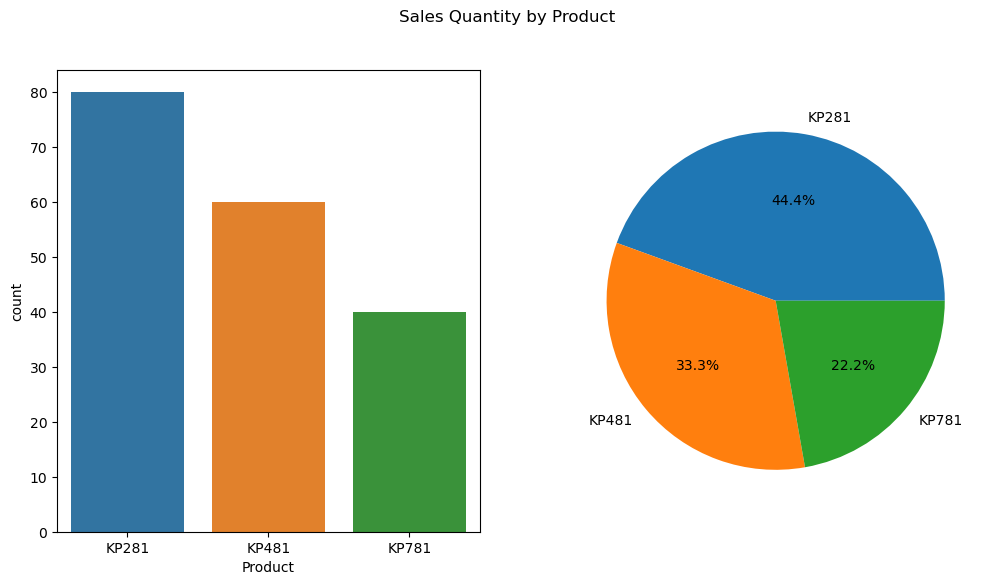

In [35]:
plot_count(raw_data, 'Product')

**Inference:**
- `KP281 has highest market share among other products`

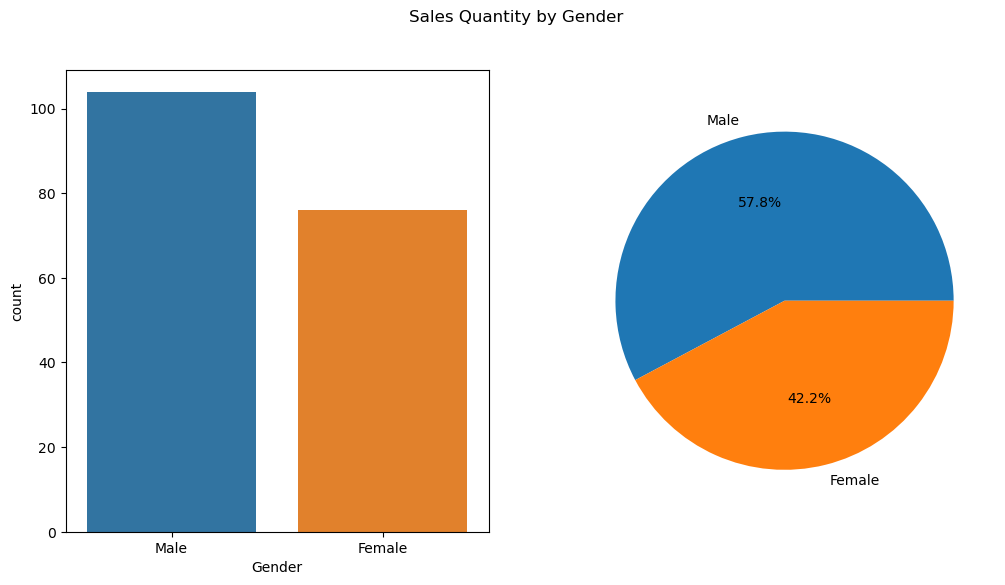

In [36]:
plot_count(raw_data, 'Gender')

**Inference:**
- `Purchase of male customer is the most`

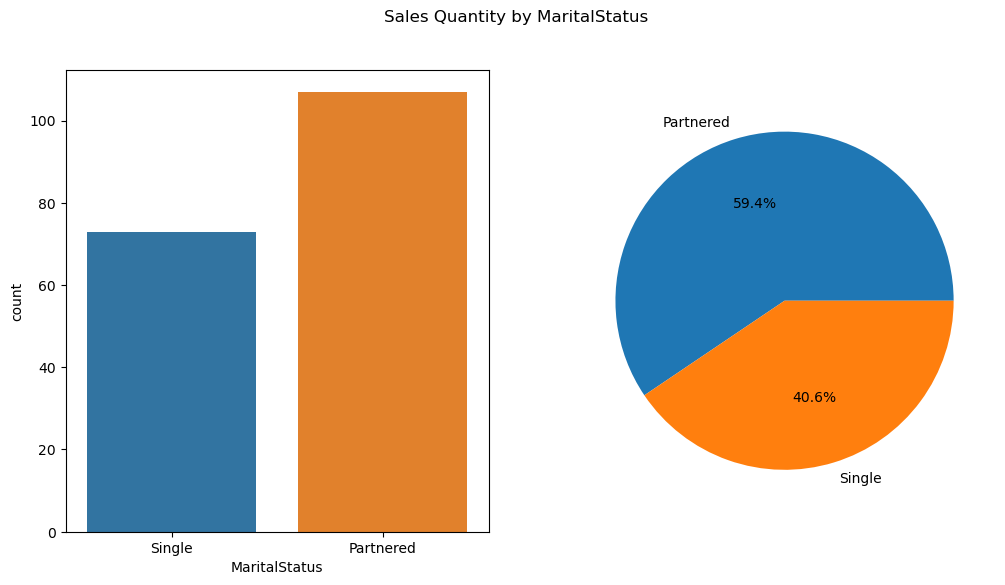

In [37]:
plot_count(raw_data, 'MaritalStatus')

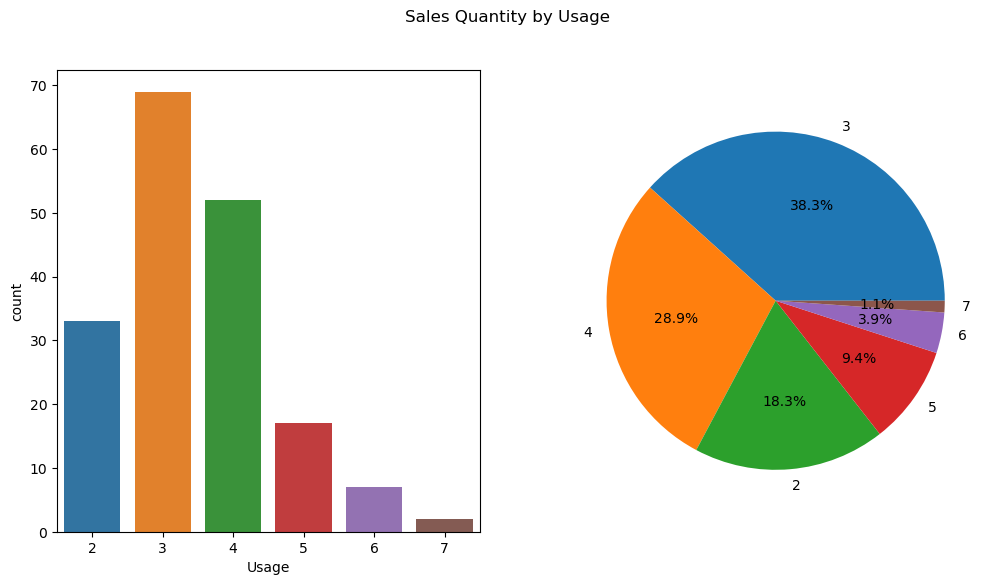

In [38]:
plot_count(raw_data, 'Usage')

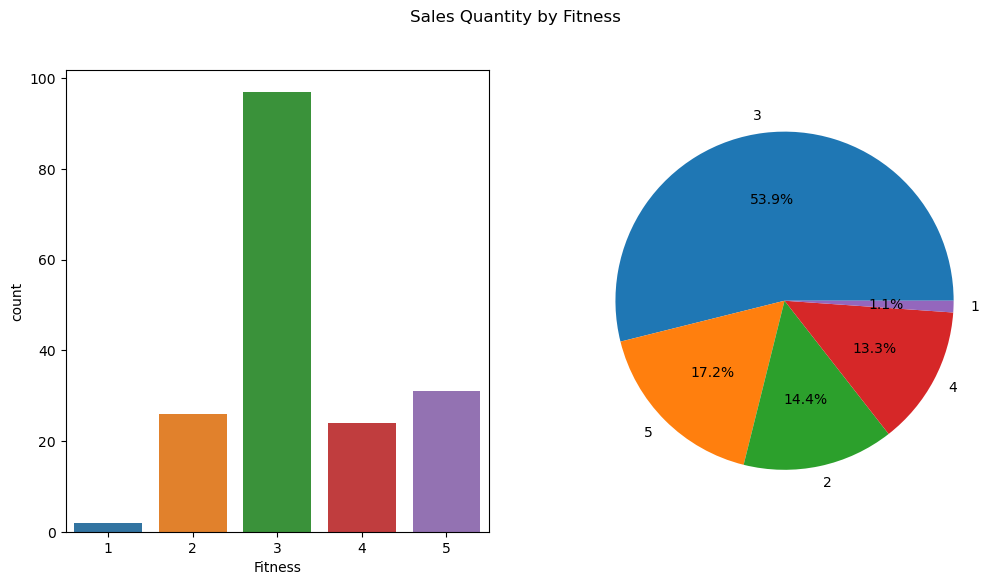

In [39]:
plot_count(raw_data, 'Fitness')

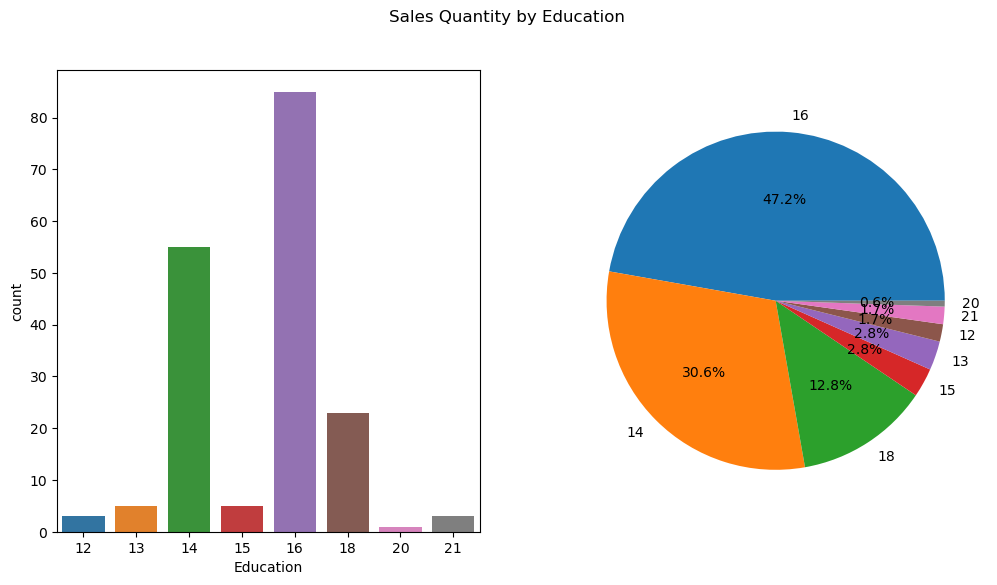

In [40]:
plot_count(raw_data, 'Education')

## UVA on Numerical columns

In [48]:
def plot_hist(df, col):
    plt.suptitle('Sales Quantity by ' + col)
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = col)
    plt.subplot(1,2,2)
    sns.boxplot(data = df, y = col)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


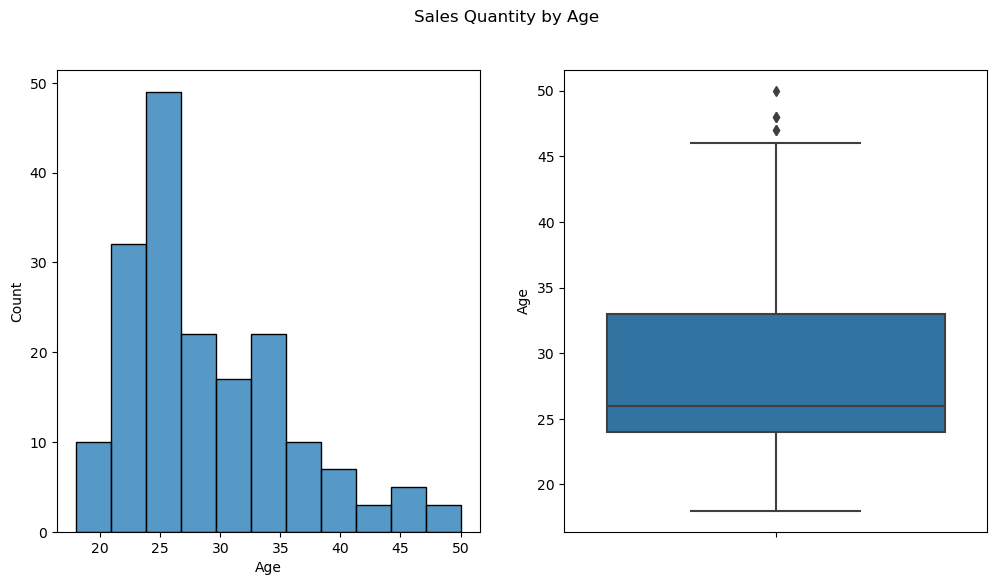

In [49]:
plot_hist(raw_data, 'Age')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


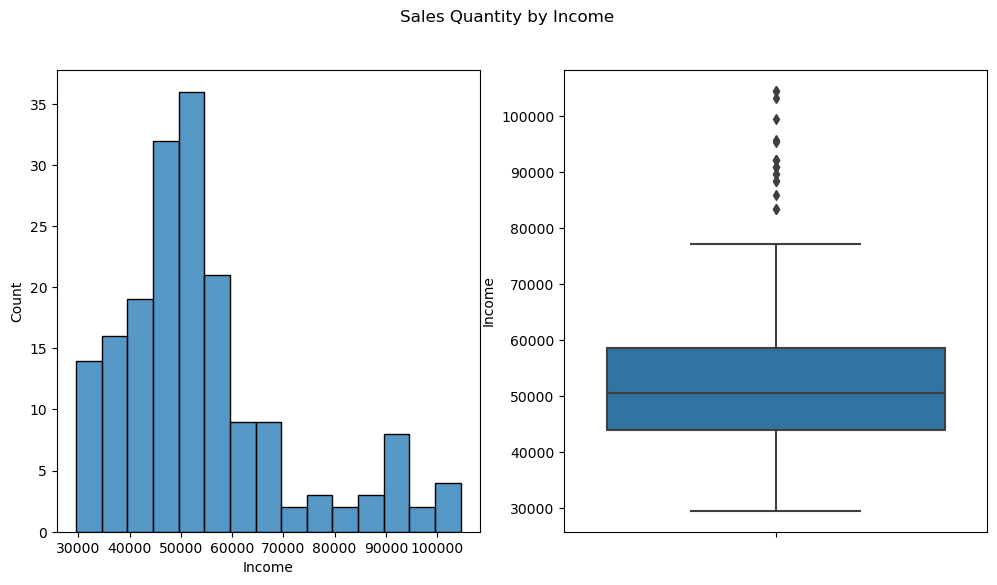

In [50]:
plot_hist(raw_data, 'Income')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


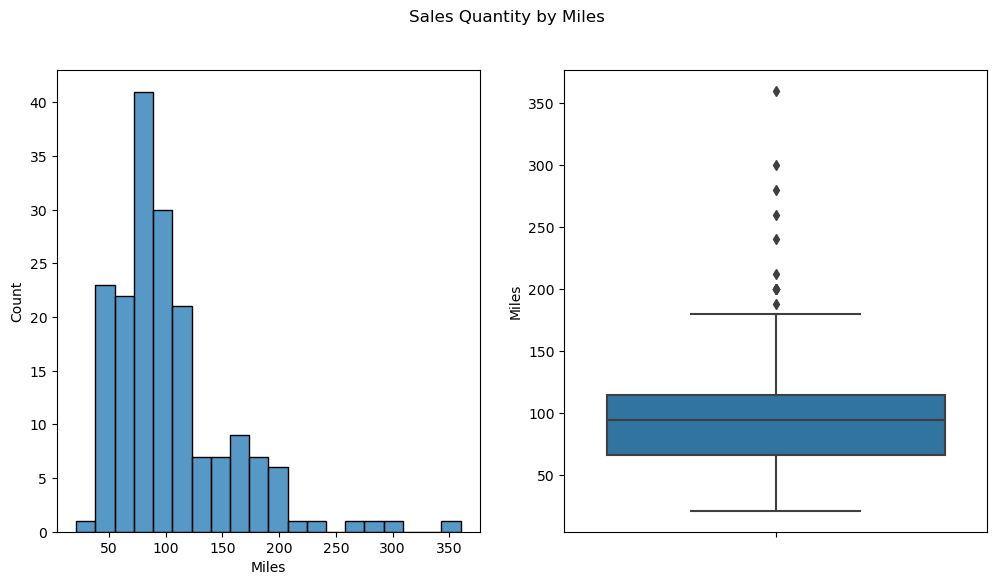

In [51]:
plot_hist(raw_data, 'Miles')